### MSEplots on PYPI: pip install MSEplots-pkg
----------
msed_plots(pressure,temperature,mixing_ratio,h0_std,ensemble_size,ent_rate,entrain=Flase)<br>
    - pressure: vertical profile of pressure, array-like <br>
    - temperature: vertical profile of temperature, array-like <br>
    - specific humidity: vertical profile of specific humidity, array-like
    - h0_std: standard deviation for mse variations at the surface, default=2000 [Joule/kg]
    - ensemble_size: size of mse variations, default=20
    - ent_rate: entrainment scale, default=np.range(0,2,0.05) [1/km]
    - entrain: switch for displaying profiles of entrained parcels, default=False

In [1]:
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
from MSEplots import plots as mpt
#from MSEplots/plots.py import plots as mpt     #doesn't work, would be useful for development

/Users/bem/miniconda3/envs/unidata/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [10]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2020, 5, 12, 12)
station = 'SKBQ' ; title='2020-05-12, 12Z Barranquilla'
df = WyomingUpperAir.request_data(date, station)

In [3]:
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values 

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
# q = specific_humidity_from_mixing_ratio(q)

In [7]:
import metpy.calc.thermo as mpcalc
%run MSEplots/plots.py

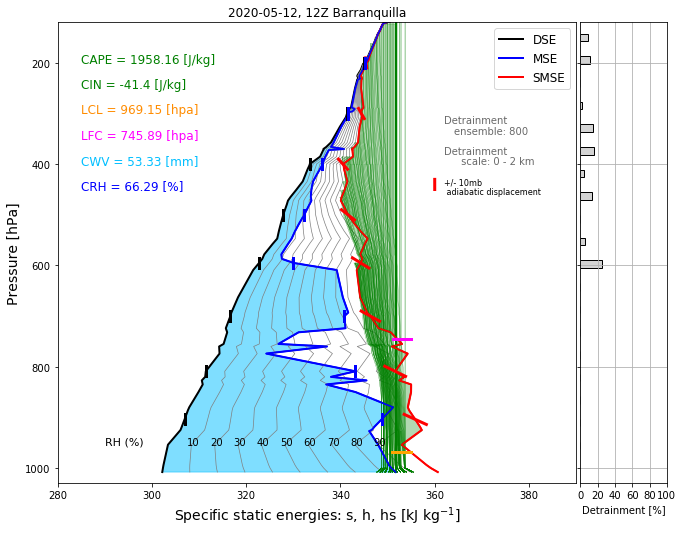

In [15]:
ax = mpt.msed_plots(pressure, Temp, q, altitude, h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True, 
                    title=title)
# mpt.add_RCEREF(ax, cooling=-2,heatflux=180)
# mpt.add_curves_Wyoming(ax, datetime(2018,11,10,12),'MFL',linewidth=1.0)

In [17]:
!date

Tue May 12 15:53:19 EDT 2020
